In [22]:
from platform import python_version
print(python_version())

3.7.9


In [23]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [24]:
import tensorflow as tf

tf.__version__

'1.14.0'

In [34]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))  # input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # dense layer (128 neurons)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  # 10 for # of class, softmax for probability distribution

model.compile(optimizer = 'adam',  # 
             loss = 'sparse_categorical_crossentropy',    # NN performs not to maximize ACC, but to minimize loss
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

## So far, overfitted! ##

Epoch 1/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2596 - acc: 0.9241
Epoch 2/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1065 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0723 - acc: 0.9774


In [35]:
## Calculate validation loss
import numpy as np
#x_test = np.array(x_test)
#y_test = np.array(y_test)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0992 - acc: 0.9674
0.09915543714175001 0.9674


<function matplotlib.pyplot.show(close=None, block=None)>

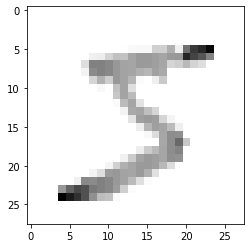

In [36]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show
# print(x_train[0])

In [37]:
model.save('epic_num_reader.model')

In [38]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [39]:
predictions = new_model.predict([x_test])

In [40]:
print(predictions)

[[1.4182979e-08 1.2030792e-07 4.3017459e-05 ... 9.9994183e-01
  3.3197054e-07 4.5223445e-07]
 [1.8359653e-08 5.3691601e-06 9.9998283e-01 ... 2.7354926e-11
  8.6849641e-06 3.2546828e-13]
 [5.5323090e-07 9.9974865e-01 1.7479118e-05 ... 5.7615420e-05
  1.4846203e-04 2.3800962e-06]
 ...
 [3.8878190e-09 7.5826549e-08 8.9455963e-09 ... 2.1420931e-06
  1.9087679e-07 1.0814917e-04]
 [5.5981611e-05 6.6270495e-08 3.9575789e-07 ... 1.5729370e-06
  3.7849804e-03 2.2794666e-07]
 [2.0485468e-05 5.7996175e-08 2.3500652e-06 ... 3.1674985e-10
  3.0553986e-07 4.1691388e-09]]


In [41]:
## prediction?

import numpy as np
print(np.argmax(predictions[0]))

7


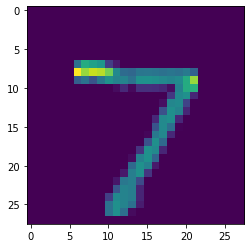

In [42]:
plt.imshow(x_test[0])
plt.show()